<a href="https://colab.research.google.com/github/ManullangJihan/100-Day-ML-Challenge/blob/main/07_Diabetes_Indicator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap
!pip install eli5
!pip install scikit-optimize
!pip install catboost

# Diabetes Health Indicator
---

## Konteks

Context

Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. Diabetes is generally characterized by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.

Complications like heart disease, vision loss, lower-limb amputation, and kidney disease are associated with chronically high levels of sugar remaining in the bloodstream for those with diabetes. While there is no cure for diabetes, strategies like losing weight, eating healthily, being active, and receiving medical treatments can mitigate the harms of this disease in many patients. Early diagnosis can lead to lifestyle changes and more effective treatment, making predictive models for diabetes risk important tools for public and public health officials.

The scale of this problem is also important to recognize. The Centers for Disease Control and Prevention has indicated that as of 2018, 34.2 million Americans have diabetes and 88 million have prediabetes. Furthermore, the CDC estimates that 1 in 5 diabetics, and roughly 8 in 10 prediabetics are unaware of their risk. While there are different types of diabetes, type II diabetes is the most common form and its prevalence varies by age, education, income, location, race, and other social determinants of health.

## Konten
1. Diabetes_binary -> 0 = no diabetes, 1 = prediabetes, 2 = diabetes
2. HighBP -> 0 = no high BP, 1 = High BP
3. HighChol -> 0 = no high cholestro, 1 = high cholestrol
4. CholCheck -> 0 = no cholestrol check in 5 years, 1 = yes cholector check in 5 years.
5. BMI -> Body Mass Index
6. Smoker -> Have you smoked at least 100 cigarettes in your entire life? Note: 5 packs = 100 cigarettes 0 = no 1 = yes
7. Stroke -> (Ever told) you had a stroke. 0 = no 1 = yes
8. HeartDiseaseorAttack -> Coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
9. PhysicsActivity -> physical activity in past 30 days - not including job 0 = no 1 = yes
10. Fruits -> Consume Fruit 1 or more times per day 0 = no 1 = yes
11. Veggies -> Consume Vegetables 1 or more times per day 0 = no 1 = yes
12. HvyAlcoholConsump -> (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes
13. AnyHealthCare -> Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
14. NodocbcCost -> Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes
15. GenHlth -> Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
16. MentHlth -> days of poor mental health scale 1-30 days
17. PhysHlth -> physical illness or injury days in past 30 days scale 1-30
18. DiffWalk -> Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
19. Sex -> 0 = female 1 = male
20. Age -> 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older
21. Education -> Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = elementary etc.
22. Income -> Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more

[Sumber Data](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)

In [3]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px

import ipywidgets as widgets
from ipywidgets import fixed

In [4]:
# Setting visualization default
import plotly.io as pio

pio.templates[pio.templates.default] = 'plotly_dark'
plt.rcParams['figure.figsize'] = [14, 10]
plt.rcParams.update({'font.size': 18})

In [5]:
# Adjust random setting for reproducible results
def set_seed(s):
    random.seed(s)
    np.random.seed(s)

global_seed = 42
set_seed(global_seed)

In [6]:
# Import and load the dataset
path = "/content/drive/MyDrive/diabetes_balance.csv"
main_df = pd.read_csv(path)

n_samples, n_features = main_df.shape
all_feats = main_df.columns.values.tolist()
numeric_feats = main_df.columns[main_df.dtypes != 'object']
categorical_feats = main_df.columns[main_df.dtypes == 'object']

print(f'Number of samples: {n_samples}')
print(f'Number of features: {n_features}\n')

main_df.head()

Number of samples: 70692
Number of features: 22



,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [6]:
# Create table for Statistics of Numerical Features

main_df.describe().T.style.bar(
    subset=['mean'])\
    .background_gradient(subset=['std'], cmap='coolwarm')\
    .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,70692.000000,0.500000,0.500004,0.000000,0.000000,0.500000,1.000000,1.000000
HighBP,70692.000000,0.563458,0.495960,0.000000,0.000000,1.000000,1.000000,1.000000
HighChol,70692.000000,0.525703,0.499342,0.000000,0.000000,1.000000,1.000000,1.000000
CholCheck,70692.000000,0.975259,0.155336,0.000000,1.000000,1.000000,1.000000,1.000000
BMI,70692.000000,29.856985,7.113954,12.000000,25.000000,29.000000,33.000000,98.000000
Smoker,70692.000000,0.475273,0.499392,0.000000,0.000000,0.000000,1.000000,1.000000
Stroke,70692.000000,0.062171,0.241468,0.000000,0.000000,0.000000,0.000000,1.000000
HeartDiseaseorAttack,70692.000000,0.147810,0.354914,0.000000,0.000000,0.000000,0.000000,1.000000
PhysActivity,70692.000000,0.703036,0.456924,0.000000,0.000000,1.000000,1.000000,1.000000
Fruits,70692.000000,0.611795,0.487345,0.000000,0.000000,1.000000,1.000000,1.000000


In [7]:
# Delete Duplicated sample

duplicate_idx = main_df.duplicated()
print(f'Number of samples before removing duplicated row: {n_samples}')
main_df = main_df[~duplicate_idx]
n_samples = main_df.shape[0]
print(f'Number of samples after removing duplicated row: {n_samples}')

Number of samples before removing duplicated row: 70692
Number of samples after removing duplicated row: 69057


In [8]:
# Plot the mean Skewness value for every feature

def plot_skew(skew_vals):
    fig = px.bar(
        y = all_feats,
        x = skew_vals,
        orientation = 'h',
        text_auto=True,
    )

    fig.update_layout(
        width=900,
        height=600,
        title="Absolute Skew Value For Every Feature",
        xaxis_title="Skew Value"
    )
    fig.show()

skew_vals = np.abs(main_df.skew().values.tolist())
plot_skew(skew_vals)

In [9]:
# Normalize the skewed features
from scipy.stats import yeojohnson

new_df = main_df.copy()
def normalize_skew(df):
    numeric_feats = df.columns[df.dtypes != 'object']    
    for col in numeric_feats:
        if abs(df[col].skew()) > 0.75:    
            df.loc[:, col] = yeojohnson(df.loc[:, col])[0]
    return df

new_df = normalize_skew(new_df)
skew_vals = np.abs(new_df.skew().values.tolist())
plot_skew(skew_vals)

Since many of our skewed features are categorical integer value (0 and 1) transforming them with yeojohnson transformation not change the shape of the distribution.

From now we will try to evaluate every changing in our dataset with LogisticRegression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, train_test_split

def evaluate_acc_cm(df):
      
    X = df.drop('Diabetes_binary', axis=1)
    y = df.Diabetes_binary.values
    Xtrain, Xtest, ytrain, ytest = train_test_split(
      X, y, test_size = 0.4, shuffle=True)

    clf = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1e6)
    clf.fit(Xtrain, ytrain)
    y_pred = clf.predict(Xtest)

    acc = cross_val_score(
      clf, Xtest, ytest, scoring='accuracy', cv=5)
    acc_mean = np.mean(acc)
    acc_std = np.std(acc)

    cm_vals = confusion_matrix(ytest, y_pred)

    return acc_mean, cm_vals


In [16]:
accuracies = dict()
accuracies['main_df'], main_df_cm = evaluate_acc_cm(main_df)

In [17]:
def plot_cf_matrix(acc_mean, cf_vals):
    
    fig = px.imshow(
      cf_vals, x=[0,1], y=[0,1], text_auto=True)

    fig.update_layout(
      title = f"Accuracy Mean Score: {acc_mean:.3f}%",
      xaxis_title = "Predicted",
      yaxis_title = "True Value",
      height = 500,
      width = 500)
    
    fig.update_xaxes(nticks=3)
    fig.update_yaxes(nticks=3)

    fig.show()


In [18]:
plot_cf_matrix(accuracies['main_df'], main_df_cm)

# Evaluate Accuracy For Dimensionality-Reduction Transformed Dataset and Compare the result with original Dataset

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import mutual_info_classif

def evaluate_decomp(df, decomp_method):
    X = df.drop('Diabetes_binary', axis=1)
    y = df.Diabetes_binary

    Xtrain, Xtest, ytrain, ytest = train_test_split(
        X, y, test_size=0.4, shuffle=True
    )
    accuracies = []
    best_acc = 0
    best_n = 0

    for n in range(5, 20):  
        selector = decomp_method.set_params(n_components=n).fit(Xtrain)
        X_train = selector.transform(Xtrain)
        X_test = selector.transform(Xtest)

        clf = LogisticRegression(max_iter=1e6).fit(X_train, ytrain)
        acc = clf.score(X_test, ytest)
        accuracies.append(acc)
        if acc > best_acc:
            best_acc = acc
            best_n = n

    fig = px.line(x=range(5, 20), y=accuracies,)
    decomp_name = type(decomp_method).__name__
    print(f"Best Accuracy: {best_acc:.4f} found with n_components={best_n}")
    print()
    title = f"Accuracies with {decomp_name} transformed Dataset"
    fig.update_layout(
        title=title,
        xaxis_title='Number of Components',
        yaxis_title="Accuracy",
        height=500,
        width=700,)
    
    fig.show()

In [15]:
svc = TruncatedSVD()
evaluate_decomp(main_df, svc)

Best Accuracy: 0.7434 found with n_components=16



In [16]:
pca = PCA()
evaluate_decomp(main_df, pca)

Best Accuracy: 0.7431 found with n_components=19



From our evaluation with dimensionality-reduction transformed dataset, we can keep only 16 to 19 of 21 features to get the same accuracy. But since the accuracy not increasing and the number of features to keep just 2 less lower than original Dataset we will use the original dataset.

## Evaluate feature-engineering Dataset

Next we will try to feature-engineering the Dataset.
Before that we will try to see Permutation Importance with LogisticRegression and feature engineering the most importance feature

In [63]:
import eli5
from eli5.sklearn import PermutationImportance

X = main_df.drop('Diabetes_binary', axis=1)
y = main_df.Diabetes_binary

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, shuffle=True
)

clf = LogisticRegression(max_iter=1e6)
clf.fit(X_train, y_train)

perm = PermutationImportance(clf)
perm.fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X.columns.values.tolist())

Weight,Feature
0.0560 ± 0.0009,GenHlth
0.0307 ± 0.0028,BMI
0.0248 ± 0.0017,Age
0.0177 ± 0.0015,HighBP
0.0104 ± 0.0025,HighChol
0.0041 ± 0.0007,CholCheck
0.0027 ± 0.0012,Income
0.0025 ± 0.0008,HvyAlcoholConsump
0.0022 ± 0.0020,Sex
0.0008 ± 0.0002,HeartDiseaseorAttack


We see that GenHlth, BMI, and Age are the top 3 that play important role to increase the accuracy. Now we will try to improve our Accuracy by adding some new informative feature from this insight

Since we don't have height feature in our dataset, Calculating the BMI status for every height become impossible. Feature-engineering anything else seems not improve the Accuracy.


In [9]:
new_df = main_df.copy()

In [10]:
# Health Condition is 1 (Good) if Blood pressure and Cholesterol are 0 and 0 (Bad) otherwise
new_df['HealthCond'] = 1.0
new_df.loc[new_df.index[(new_df['HighBP'] == 1) & new_df['HighChol'] == 1], 'HealthCond'] = 0.0

In [11]:
new_df['HealthCond'].value_counts()

1.0    42828
0.0    26229
Name: HealthCond, dtype: int64

We Have 42828 sample that has high blood pressure and high Cholestrol and 26229 either have one or not at all

In [12]:
# LifeStyle is 0 (Bad) if sample is smoker and not Heavy Alcohol Consumer and 1 otherwise
new_df['LifeStyle'] = 1
new_df.loc[new_df.index[(new_df['HvyAlcoholConsump'] == 1) & (new_df['Smoker'] == 1)], 'LifeStyle'] = 0

In [13]:
new_df['LifeStyle'].value_counts()

1    67071
0     1986
Name: LifeStyle, dtype: int64

In [21]:
accuracies['new_df'], new_df_cm = evaluate_acc_cm(new_df)
plot_cf_matrix(accuracies['new_df'], new_df_cm)

Our data consist many Boolean type (1 or 0) and lack of continuous type. Furthermore the Age feature has also binned into categorical int that make model will less accurate in prediction (Since we have 'bumpy' changes in our dataset and lack of detail). Here is the full explanation about why you should not binned your continuous value into categorical [Source](http://madrury.github.io/jekyll/update/statistics/2017/08/04/basis-expansions.html) and [Second Source](https://stats.stackexchange.com/questions/390705/why-should-binning-be-avoided-at-all-costs)


---


The last thing I will try to do is to optimize the CatBoostClassifier using skopt library and see the Accuracy



In [23]:
from functools import partial
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
from skopt import gp_minimize, space

X = new_df.drop('Diabetes_binary', axis=1)
y = new_df.Diabetes_binary

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, shuffle=True
)

def optimize(params, param_names, x, y):
    params = dict(zip(param_names, params))
    model = CatBoostClassifier(**params, thread_count=4, verbose=False)

    results = cross_val_score(
        model, x, y, scoring='accuracy', cv=5,)
    
    return -1.0 * np.mean(results)

param_grid = [space.Integer(1, 15, name='depth'),
              space.Integer(100, 1000, name='iterations'),
              space.Real(0.001, 0.3, name='learning_rate'),
              space.Integer(1, 100, name='l2_leaf_reg'),
              space.Integer(5, 200, name='border_count')]

param_names = ['depth', 'iterations', 'learning_rate', 'l2_leaf_reg', 'border_count']
optimization_function = partial(
    optimize,
    param_names = param_names,
    x = X_train,
    y = y_train
)

results = gp_minimize(
    optimization_function,
    dimensions = param_grid,
    n_calls = 20,
)

In [24]:
best_params = dict(zip(param_names,results.x))
print(best_params)

{'depth': 2, 'iterations': 1000, 'learning_rate': 0.3, 'l2_leaf_reg': 24, 'border_count': 142}


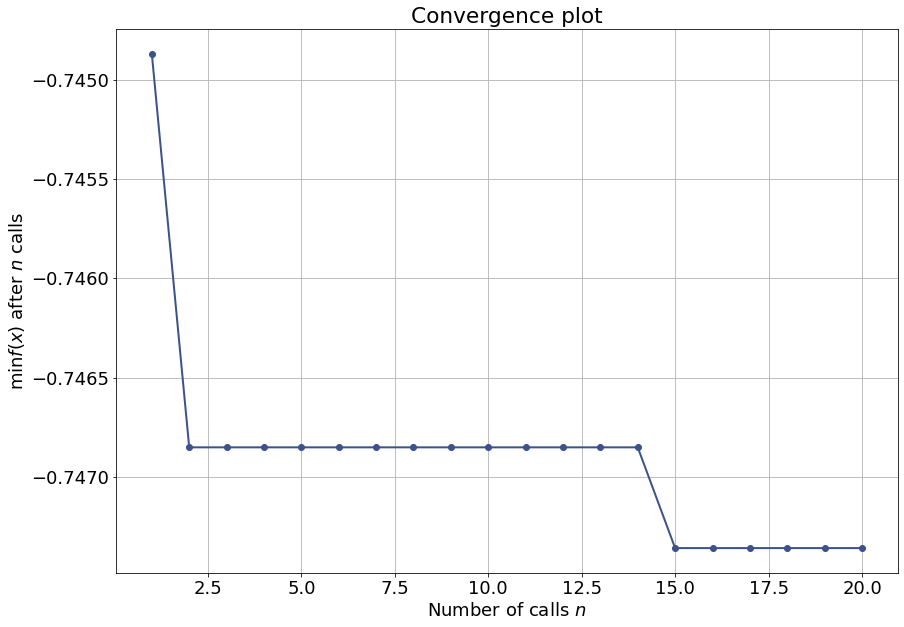

In [27]:
from skopt.plots import plot_convergence

plot_convergence(results)

The Accuracy not Improve above 0.75 